# Indexing

## Load Data <br>

REF: Document Loader[PDF, WebPage, CSV like]: https://python.langchain.com/docs/how_to/#document-loaders

### Web Loader

In [2]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

In [3]:
url = "https://lilianweng.github.io/posts/2023-06-23-agent/"

bs4_strainer = bs4.SoupStrainer(class_=('post-title', 'post-header', 'post-content'))
loader = WebBaseLoader(web_path=url, bs_kwargs={'parse_only': bs4_strainer})

web_data = loader.load()

In [3]:
web_data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [4]:
print(web_data[0])

page_content='

      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:

Planning

Subgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.
Reflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.


Memory

Short-t

### PDF Loader

In [5]:
from langchain_community.document_loaders import PyPDFLoader

In [6]:
file_path = r"A:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\data\pdfs\2509.03680v1.pdf"

pdf_loader = PyPDFLoader(file_path)

pdf_data = pdf_loader.load()
len(pdf_data)



25

In [7]:
pdf_data[0]

Document(metadata={'producer': 'pikepdf 8.15.1', 'creator': 'arXiv GenPDF (tex2pdf:)', 'creationdate': '', 'author': 'Ruofan Liang; Kai He; Zan Gojcic; Igor Gilitschenski; Sanja Fidler; Nandita Vijaykumar; Zian Wang', 'doi': 'https://doi.org/10.48550/arXiv.2509.03680', 'license': 'http://creativecommons.org/licenses/by/4.0/', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'title': 'LuxDiT: Lighting Estimation with Video Diffusion Transformer', 'trapped': '/False', 'arxivid': 'https://arxiv.org/abs/2509.03680v1', 'source': 'A:\\Indian_AI_Production_5\\agentic_ai\\agentic_ai_projects\\data\\pdfs\\2509.03680v1.pdf', 'total_pages': 25, 'page': 0, 'page_label': '1'}, page_content='LuxDiT: Lighting Estimation with Video Diffusion\nTransformer\nRuofan Liang1,2,3 Kai He1,2,3 Zan Gojcic1 Igor Gilitschenski2,3\nSanja Fidler1,2,3 Nandita Vijaykumar2,3† Zian Wang1,2,3†\n1NVIDIA 2University of Toronto 3Vector Institute\nAbstract\nEstimat

In [8]:
all_data = web_data + pdf_data
all_data

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [9]:
print(all_data[1].page_content)

LuxDiT: Lighting Estimation with Video Diffusion
Transformer
Ruofan Liang1,2,3 Kai He1,2,3 Zan Gojcic1 Igor Gilitschenski2,3
Sanja Fidler1,2,3 Nandita Vijaykumar2,3† Zian Wang1,2,3†
1NVIDIA 2University of Toronto 3Vector Institute
Abstract
Estimating scene lighting from a single image or video remains a longstand-
ing challenge in computer vision and graphics. Learning-based approaches are
constrained by the scarcity of ground-truth HDR environment maps, which are
expensive to capture and limited in diversity. While recent generative models
offer strong priors for image synthesis, lighting estimation remains difficult due
to its reliance on indirect visual cues, the need to infer global (non-local) con-
text, and the recovery of high-dynamic-range outputs. We propose LuxDiT, a
novel data-driven approach that fine-tunes a video diffusion transformer to gen-
erate HDR environment maps conditioned on visual input. Trained on a large
synthetic dataset with diverse lighting conditions, our 

## Splitting Documents

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [11]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200,  add_start_index=True)
all_splits = text_splitter.split_documents(all_data)
print("Total Documents : ", len(all_data))
print("Total Split : ", len(all_splits))


Total Documents :  26
Total Split :  160


In [12]:
all_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 8}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from

In [13]:
all_splits[0].page_content

'LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory'

## Embedding

REFE: https://platform.openai.com/docs/guides/embeddings/embedding-models

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_openai import OpenAIEmbeddings

In [3]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [17]:
embb_1 = embeddings.embed_query("I am learning LLM")

In [18]:
len(embb_1)

3072

In [19]:
embb_2 = embeddings.embed_query("How are you")
len(embb_2)

3072

In [20]:
embb_1[:10], embb_2[:10]

([-0.021494783461093903,
  0.0489584244787693,
  -0.026290571317076683,
  0.02522100694477558,
  0.015525927767157555,
  -0.006348379421979189,
  -0.0041898442432284355,
  0.0436796098947525,
  -0.020476972684264183,
  0.038262784481048584],
 [0.0001367140212096274,
  0.02260086126625538,
  -0.013737630099058151,
  -0.004893321078270674,
  0.004681390710175037,
  0.0048441230319440365,
  -0.01318509690463543,
  0.006338988896459341,
  -0.007008840329945087,
  0.032697830349206924])

## Vector Store

In [4]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import  FAISS

In [23]:
index = faiss.IndexFlatL2(len(embb_2))
vector_store = FAISS(embedding_function=embeddings, 
                    index=index,
                    docstore=InMemoryDocstore(),
                    index_to_docstore_id={}
                    )

In [24]:
_ = vector_store.add_documents(all_splits)

In [25]:
vector_store.similarity_search("What is LuxDiT", k=4)

[Document(id='8b7f80bb-2ee0-4b71-bd74-44f65bd671b1', metadata={'producer': 'pikepdf 8.15.1', 'creator': 'arXiv GenPDF (tex2pdf:)', 'creationdate': '', 'author': 'Ruofan Liang; Kai He; Zan Gojcic; Igor Gilitschenski; Sanja Fidler; Nandita Vijaykumar; Zian Wang', 'doi': 'https://doi.org/10.48550/arXiv.2509.03680', 'license': 'http://creativecommons.org/licenses/by/4.0/', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'title': 'LuxDiT: Lighting Estimation with Video Diffusion Transformer', 'trapped': '/False', 'arxivid': 'https://arxiv.org/abs/2509.03680v1', 'source': 'A:\\Indian_AI_Production_5\\agentic_ai\\agentic_ai_projects\\data\\pdfs\\2509.03680v1.pdf', 'total_pages': 25, 'page': 1, 'page_label': '2', 'start_index': 0}, page_content='Input Image Lighting Estimation Virtual Object Insertion\nFigure 1: LuxDiT is a generative lighting estimation model that predicts high-quality HDR envi-\nronment maps from visual input. It p

In [31]:


vector_store.similarity_search("what is Short-term memory", k=4)

[Document(id='832b4a01-4f2d-462b-8a4c-12751984a029', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 10685}, page_content='Short-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is unconscious and involves skills and routines that are pe

In [27]:
vdb_path = r"A:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\data\faiss_vdb"
vector_store.save_local(vdb_path)

In [5]:
vdb_path = r"A:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\data\faiss_vdb"
vector_store_local = FAISS.load_local(vdb_path, embeddings=embeddings,allow_dangerous_deserialization=True)

In [6]:
vector_store_local.similarity_search("What is Short-term memory", k=4)

[Document(id='832b4a01-4f2d-462b-8a4c-12751984a029', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 10685}, page_content='Short-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is unconscious and involves skills and routines that are pe

### Prompt template

In [7]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, PromptTemplate
from langchain import hub

In [8]:
RAG_PROMPT_TEMPLATE = """You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:"""

prompt = ChatPromptTemplate(
    input_variables=["context", "question"],
    messages=[
        HumanMessagePromptTemplate(
            prompt=PromptTemplate(
                input_variables=["context", "question"],
                template=RAG_PROMPT_TEMPLATE,
            )
        )
    ]
)

prompt


### or 

# prompt = hub.pull('rlm/rag-prompt') ## REF: https://smith.langchain.com/hub
# prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

## Create RAG AGENT

In [9]:
from typing_extensions import Annotated, TypedDict, List
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages
from langchain_core.documents import Document
from langchain.chat_models import init_chat_model

In [10]:
llm = init_chat_model(model='gpt-4.1-nano', model_provider="openai")

In [11]:
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_1f35c1788c', 'id': 'chatcmpl-CPBG9llx4hV8afedCZXMBz17Dnkj5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ff9276ec-9bd7-4c70-a2ab-187d1ee1b469-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [13]:
def retrieve(state:State):
    retrived_docs = vector_store_local.similarity_search(state['question'], k=4)
    return {'context': retrived_docs}

In [14]:
def generator(state: State):
    docs_content = "\n\n".join(doc.page_content  for doc in state['context'])
    messages = prompt.invoke({'question': state['question'], 'context': docs_content})
    responce = llm.invoke(messages)
    return {'answer': responce.content}

In [15]:
graph_builder = StateGraph(State)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generator", generator)

graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generator")
graph_builder.add_edge("generator", END)

graph = graph_builder.compile()

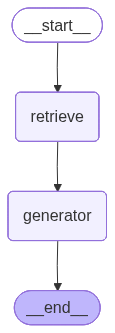

In [16]:
graph

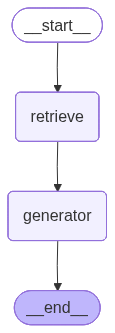

In [17]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
print(graph.get_graph().draw_mermaid()) ## REF: https://mermaid.live/

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	retrieve(retrieve)
	generator(generator)
	__end__([<p>__end__</p>]):::last
	__start__ --> retrieve;
	retrieve --> generator;
	generator --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [19]:
graph.invoke({'question': 'What is Short-term memory'})

{'question': 'What is Short-term memory',
 'context': [Document(id='832b4a01-4f2d-462b-8a4c-12751984a029', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 10685}, page_content='Short-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is un

In [20]:
graph.invoke({'question': 'What is Indian AI Production?'})

{'question': 'What is Indian AI Production?',
 'context': [Document(id='7725e059-826e-407f-bb7a-1ce8c9783cc3', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 26585}, page_content='The generative agent architecture. (Image source: Park et al. 2023)\n\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool proof-of-concept demo. A lot of code in AutoGPT is about format parsing.\nHere is the system message used by AutoGPT, where {{...}} are user inputs:\nYou are {{ai-name}}, {{user-provided AI bot description}}.\nYo